# Modeling Case 1 : Basic + Date

- 총 21개 칼럼 (LABEL 제외)

- 기본 파생변수 19개
    - 최근 6개월간 해당 업체별 수입건수, 수입금액, 검사건수, 적발건수, 적발율
        - R6M_CON_IMP_CNT
        - R6M_CON_IMP_AMT
        - R6M_CON_NUMB_OF_INSPECTION
        - R6M_CON_NUMB_OF_DETECTED
        - R6M_CON_RATIO_OF_DETECTED
    - 최근 6개월간 해당 HS CODE별 수입건수, 수입금액, 검사건수, 적발건수
        - R6M_CODE_IMP_CNT
        - R6M_CODE_IMP_AMT
        - R6M_CODE_NUMB_OF_INSPECTION
        - R6M_CODE_NUMB_OF_DETECTED
    - 최근 6개월간 해당 원산지별 수입건수, 수입금액, 검사건수, 적발건수, 적발율
        - R6M_COUNTRY_IMP_CNT
        - R6M_COUNTRY_IMP_AMT
        - R6M_COUNTRY_NUMB_OF_INSPECTION
        - R6M_COUNTRY_NUMB_OF_DETECTED
        - R6M_COUNTRY_RATIO_OF_DETECTED
    - 최근 6개월간 해당 관세사별 수입건수, 수입금액, 검사건수, 적발건수, 적발율
        - R6M_REP_IMP_CNT
        - R6M_REP_IMP_AMT
        - R6M_REP_NUMB_OF_INSPECTION
        - R6M_REP_NUMB_OF_DETECTED
        - R6M_REP_RATIO_OF_DETECTED    

- 날짜 관련 파생변수 2개
    - A_HOUR
    - C_MONTH

- Modeling 모듈의 Algorithm 클래스를 사용하여 진행

In [3]:
def syspath(path) :
  if path not in sys.path :
    sys.path.append(path)
  else : pass

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

syspath('./dataset/mod')
warnings.filterwarnings('ignore')

In [5]:
from Preprocessing import Encoder
from Modeling import Algorithm

In [6]:
df = pd.read_pickle('./dataset/41_Basic_Date.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146508 entries, 0 to 2146507
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   R6M_CON_IMP_CNT                 int64  
 1   R6M_CON_IMP_AMT                 float64
 2   R6M_CON_NUMB_OF_INSPECTION      int64  
 3   R6M_CON_NUMB_OF_DETECTED        int64  
 4   R6M_CON_RATIO_OF_DETECTED       float64
 5   R6M_CODE_IMP_CNT                int64  
 6   R6M_CODE_IMP_AMT                float64
 7   R6M_CODE_NUMB_OF_INSPECTION     int64  
 8   R6M_CODE_NUMB_OF_DETECTED       int64  
 9   R6M_COUNTRY_IMP_CNT             int64  
 10  R6M_COUNTRY_IMP_AMT             float64
 11  R6M_COUNTRY_NUMB_OF_INSPECTION  int64  
 12  R6M_COUNTRY_NUMB_OF_DETECTED    int64  
 13  R6M_COUNTRY_RATIO_OF_DETECTED   float64
 14  R6M_REP_IMP_CNT                 int64  
 15  R6M_REP_IMP_AMT                 float64
 16  R6M_REP_NUMB_OF_INSPECTION      int64  
 17  R6M_REP_NUMB_OF_DETECTED   

## LightGBM : Label Encoding

[1]	valid_0's binary_logloss: 0.600344
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.524366
[3]	valid_0's binary_logloss: 0.461085
[4]	valid_0's binary_logloss: 0.40754
[5]	valid_0's binary_logloss: 0.361895
[6]	valid_0's binary_logloss: 0.322568
[7]	valid_0's binary_logloss: 0.288558
[8]	valid_0's binary_logloss: 0.258913
[9]	valid_0's binary_logloss: 0.232926
[10]	valid_0's binary_logloss: 0.210176
[11]	valid_0's binary_logloss: 0.190062
[12]	valid_0's binary_logloss: 0.172288
[13]	valid_0's binary_logloss: 0.156583
[14]	valid_0's binary_logloss: 0.142663
[15]	valid_0's binary_logloss: 0.130228
[16]	valid_0's binary_logloss: 0.119198
[17]	valid_0's binary_logloss: 0.10933
[18]	valid_0's binary_logloss: 0.100554
[19]	valid_0's binary_logloss: 0.0926976
[20]	valid_0's binary_logloss: 0.0856528
[21]	valid_0's binary_logloss: 0.0793988
[22]	valid_0's binary_logloss: 0.0737532
[23]	valid_0's binary_logloss: 0.0686955
[24]	valid_0's binary_log

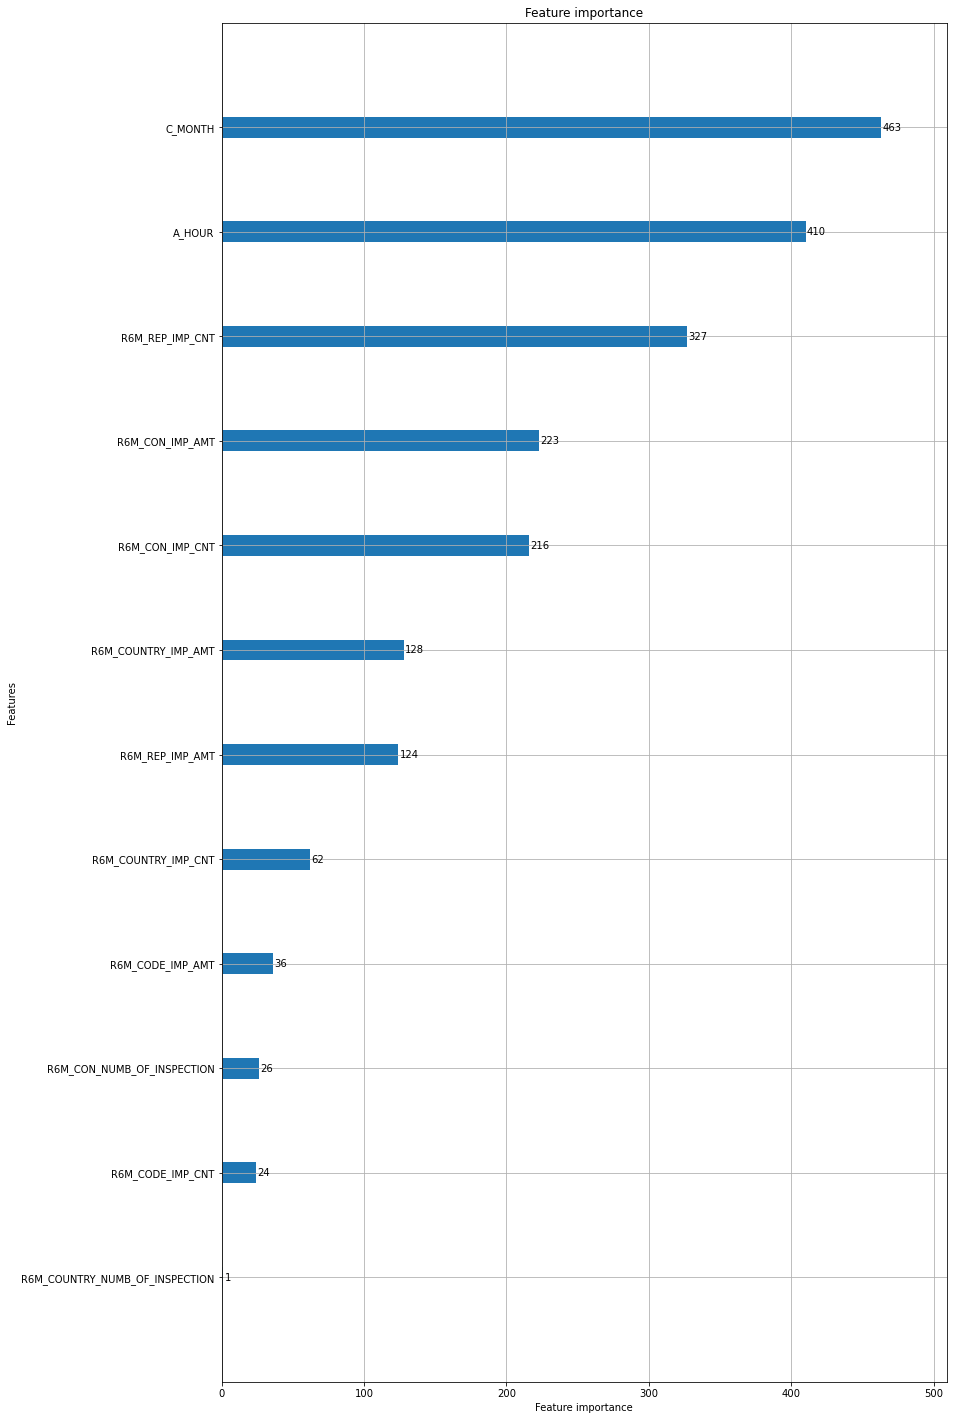

In [8]:
en = Encoder(df)
le_df = en.label()
al_l = Algorithm(le_df)
al_l.LGBM()

## LightGBM : One-hot Encoding

- One-hot Encoding 결과가 더 좋으므로 이후 알고리즘도 One-hot Encoding을 기반으로 진행

[1]	valid_0's binary_logloss: 0.600345
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.524349
[3]	valid_0's binary_logloss: 0.461025
[4]	valid_0's binary_logloss: 0.407518
[5]	valid_0's binary_logloss: 0.361886
[6]	valid_0's binary_logloss: 0.322605
[7]	valid_0's binary_logloss: 0.288541
[8]	valid_0's binary_logloss: 0.258939
[9]	valid_0's binary_logloss: 0.232976
[10]	valid_0's binary_logloss: 0.210193
[11]	valid_0's binary_logloss: 0.190156
[12]	valid_0's binary_logloss: 0.172383
[13]	valid_0's binary_logloss: 0.156626
[14]	valid_0's binary_logloss: 0.142651
[15]	valid_0's binary_logloss: 0.130257
[16]	valid_0's binary_logloss: 0.119152
[17]	valid_0's binary_logloss: 0.109254
[18]	valid_0's binary_logloss: 0.100457
[19]	valid_0's binary_logloss: 0.0925635
[20]	valid_0's binary_logloss: 0.0854852
[21]	valid_0's binary_logloss: 0.0791825
[22]	valid_0's binary_logloss: 0.073501
[23]	valid_0's binary_logloss: 0.0684347
[24]	valid_0's binary_lo

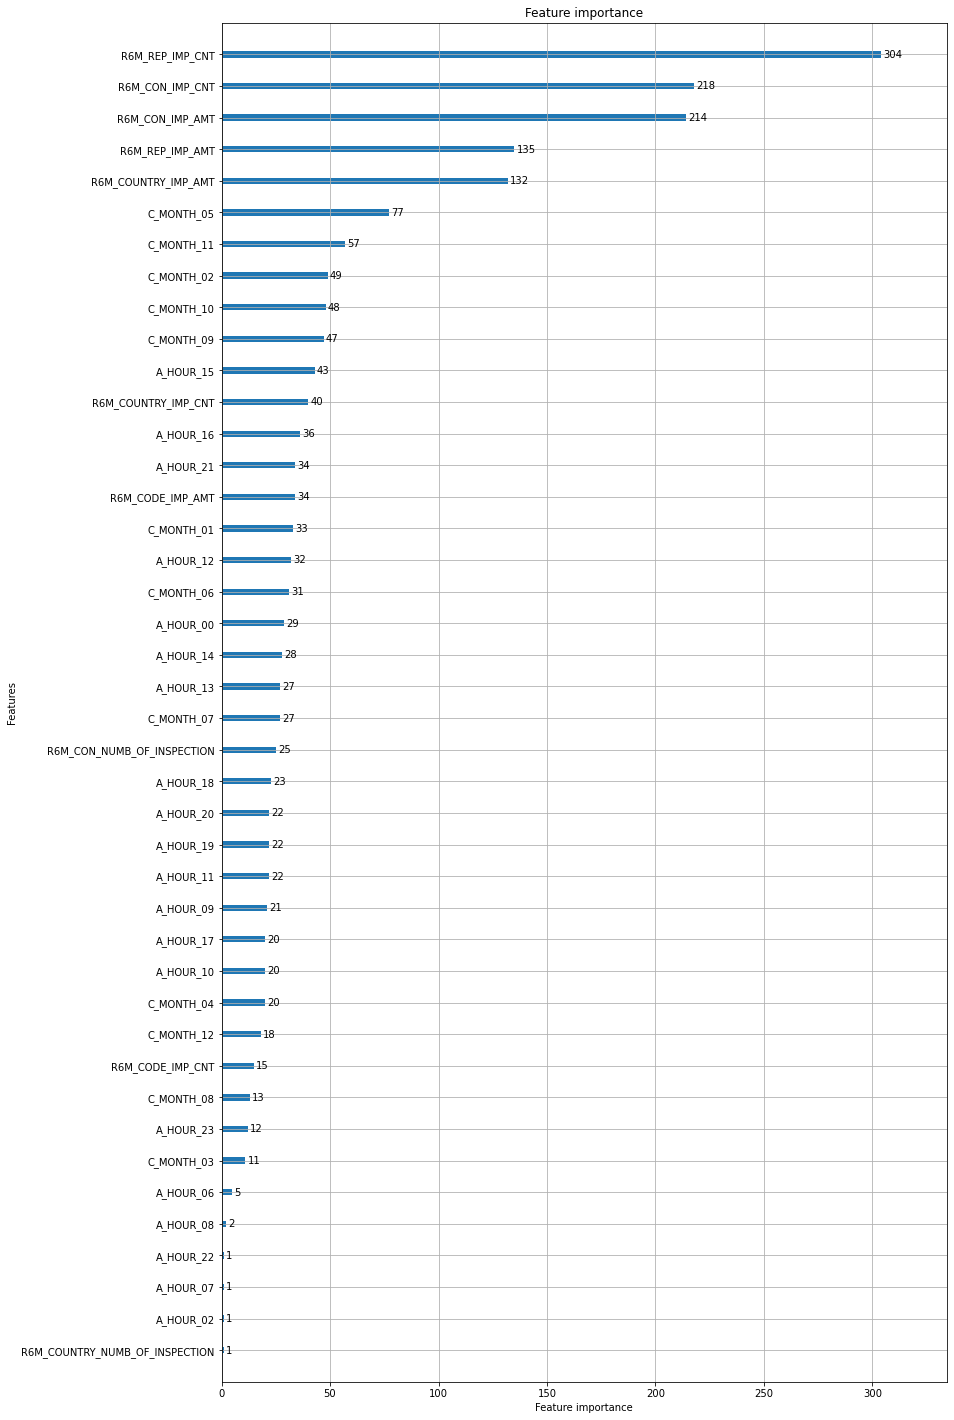

In [9]:
oh_df = en.one_hot()
al_o = Algorithm(oh_df)
al_o.LGBM()

## CatBoost

Learning rate set to 0.5
0:	learn: 0.0919028	total: 805ms	remaining: 1m 19s
1:	learn: 0.0455739	total: 1.43s	remaining: 1m 9s
2:	learn: 0.0366131	total: 2.11s	remaining: 1m 8s
3:	learn: 0.0342931	total: 2.94s	remaining: 1m 10s
4:	learn: 0.0336051	total: 3.57s	remaining: 1m 7s
5:	learn: 0.0329121	total: 4.21s	remaining: 1m 5s
6:	learn: 0.0317819	total: 4.91s	remaining: 1m 5s
7:	learn: 0.0311181	total: 5.53s	remaining: 1m 3s
8:	learn: 0.0304206	total: 6.2s	remaining: 1m 2s
9:	learn: 0.0294810	total: 6.93s	remaining: 1m 2s
10:	learn: 0.0288816	total: 7.51s	remaining: 1m
11:	learn: 0.0282536	total: 8.29s	remaining: 1m
12:	learn: 0.0273451	total: 9.04s	remaining: 1m
13:	learn: 0.0267208	total: 9.8s	remaining: 1m
14:	learn: 0.0262235	total: 10.6s	remaining: 1m
15:	learn: 0.0258632	total: 11.3s	remaining: 59.5s
16:	learn: 0.0252842	total: 12s	remaining: 58.8s
17:	learn: 0.0248100	total: 12.8s	remaining: 58.3s
18:	learn: 0.0243097	total: 13.5s	remaining: 57.3s
19:	learn: 0.0240254	total: 14.1s

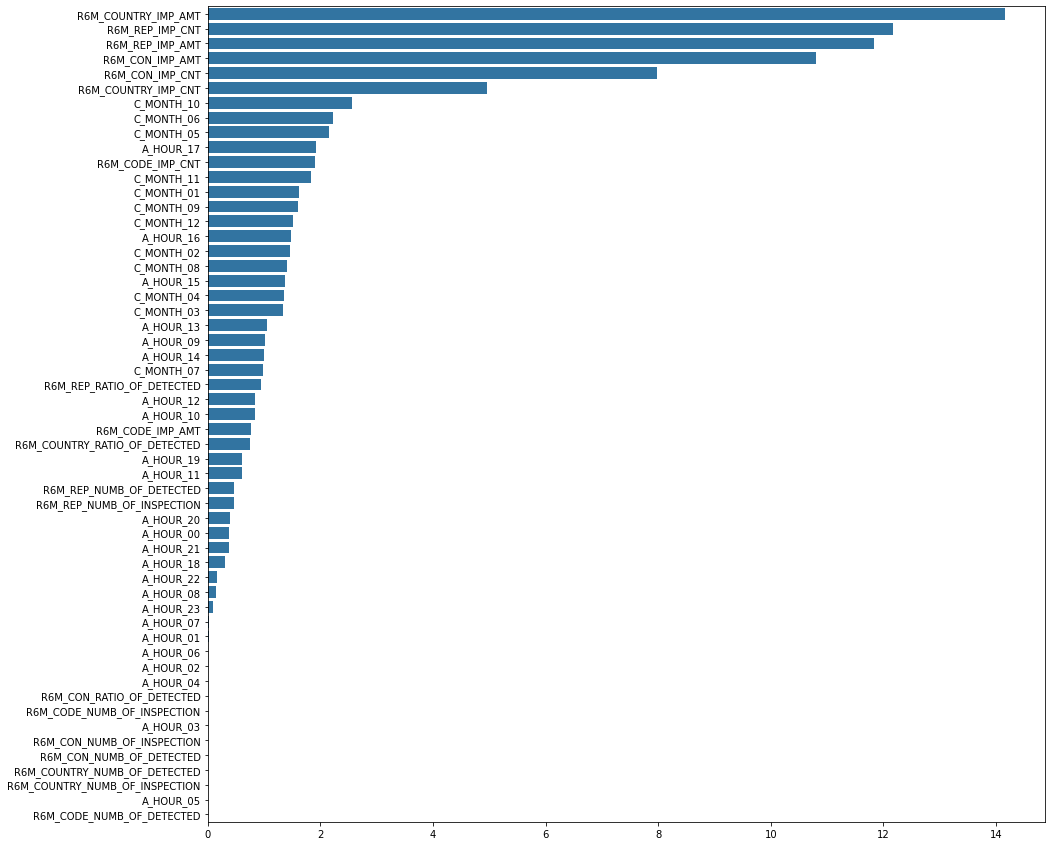

In [10]:
al_o.catboost()

## MLP

In [11]:
al_o.MLP()

Confusion Matrix
[[426304    206]
 [  2037    755]]
Accuracy : 0.9948
Precision : 0.7856
Recall : 0.2704
f1 score : 0.4023
time : 1508.2407990310003


## Random Forest

Confusion Matrix
[[426175    335]
 [   627   2165]]
Accuracy : 0.9978
Precision : 0.8660
Recall : 0.7754
f1 score : 0.8182
time : 382.9211897309997


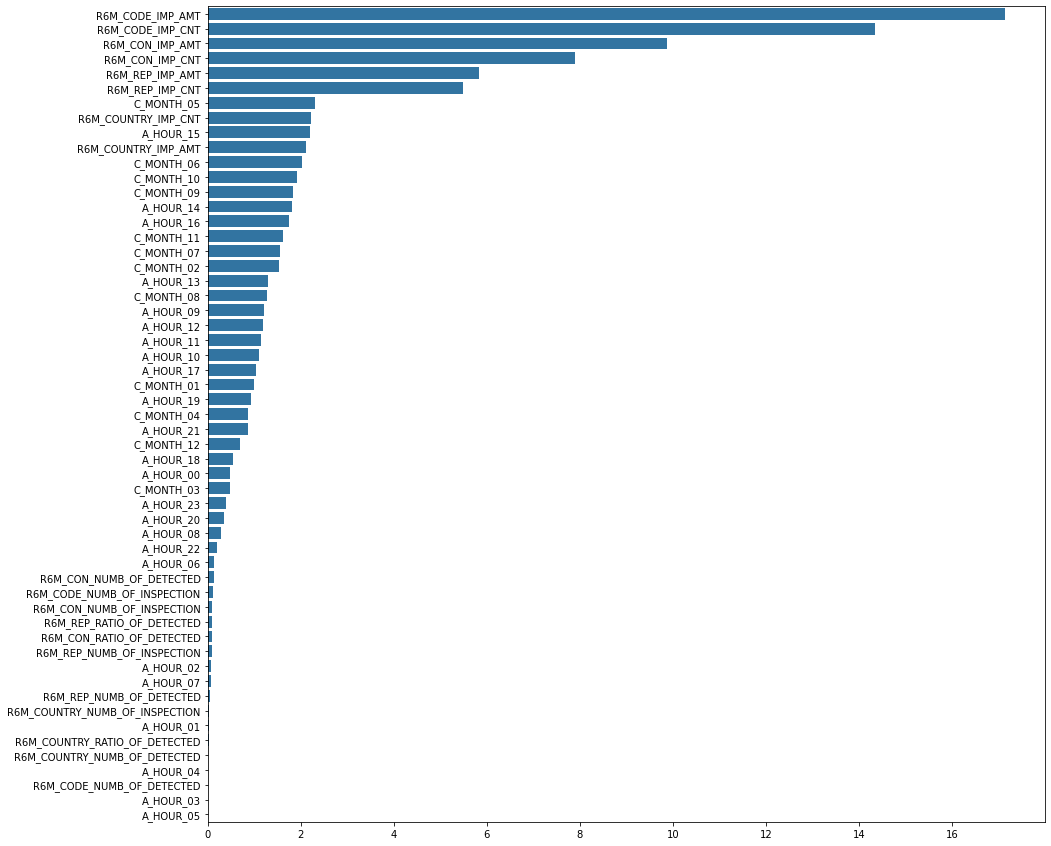

In [12]:
al_o.RF()